# <a id="0"></a> Contents
1. [Goals](#1)
1.

# <a id="1"></a> Goals

Goal of this project is to find a balance between prediction precision and number of features leveraged to create a linear regression model. 

# <a id="2"></a> Data explanation
#### [Return Contents](#0)
<hr/>

Mostly the name of the column explains what this column contains, but there are few sets which needs an explanation:
- bathrooms - it's defined as bathrooms/bedrooms - its hard to believe that there is so many houses that have 3 times more bathrooms than bedrooms, thats why I will neglect this data in further analysis. Alternatively more meticulous description should be provided. 
- view - description :Has been viewed - it's to generic it doesnt tell if it was viewed by a potencial coustomer or by an agent - It's hard to make any conclussions basing on this description.
- grade -  overall grade given to the housing unit, based on King County grading system
- sqft_above - description: square footage of house apart from basement	
- sqft_living15 - description: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area. - I will treat this data as most up to data, I assume that the price evaluation based on sqft_living15 represents current state, sqft_living could have some historical data.  (Same for sqft_lot)
 
 
 # <a id="2"></a> Assumptions
 Linear Regression Analysis
 Neglected Data I:
- date - This information is great for price changes analysis overtime but not for LinearRegression Modeling where other conditions have bigger impact
- bathrooms -  ambiguous information
- sqft_living and sqft_lot - Due to the conclusions made in "Data Explanation", sqft_living15 and sqft_lot15 will be used insted of those.
- waterfront - I will compare results of model predictions trained with and without this data
- view - neglected
- sqft_above - It is described as sqft_living minus sqft_basement -> I am going to use sqft_living15 it force creation of sqft_above15 to have  consistent information about a house.

- yr_renovated - I will create two models, one which contains info about year of renovation and other doesn't, and I will compare a results. Main reason why it may not be important is that, condition and grade represents current state of house and it may represent actual value of house better.

- zipcode, lat, long - it will be neglected due to the nature of this data 

# <a id="3"></a> Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn import metrics

In [216]:
df = pd.read_csv('kc_house_data.csv')
df = df[df['waterfront'].isin([0])] # waterfront == 0
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Data Explanation

Mostly the name of the column explains what thi column contains, but there are few sets which needs an explanation:
- bathrooms - it's defined as bathrooms/bedrooms - its hard to believe that there is so many houses that have 3 times more bathrooms than bedrooms, thats why I will neglect this data in further analysis
- view - description :Has been viewed - it's to generic it doesnt tell if it was viewed by a potencial coustomer or by an agent - I will try to assess a value of this data in future
 - grade -  overall grade given to the housing unit, based on King County grading system
  - sqft_above - description: square footage of house apart from basement	
 - sqft_living15 - description: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area. - I will treat this data as most up to data, I assume that the price evaluation based on current state and living15 represents current state. (Same for sqft_lot)
 
# Linear Regression Analysis
## Neglected Data I:
 - date - This information is great for price changes analysis overtime but not for LinearRegression Modeling where other conditions have bigger impact
 - bathrooms -  ambiguous information
 - sqft_living and sqft_lot - Due to the conclusions made in "Data Explanation", sqft_living15 and sqft_lot15 will be used insted of those.
 - waterfront - I will compare results of model predictions trained with and without this data
 - view - neglected
- sqft_above - It is described as sqft_living - sqft_basement -> I am going to use sqft_living15 it force creation of sqft_above15 to have  consistent information about a house.

- yr_renovated - I will create two models, one which contains info about year of renovation and other doesn't, and I will compare a results. Main reason why it may not be important is that, condition and grade represents current state of house and it may represent actual value of house better.

- zipcode, lat, long - it will be neglected due to the nature of this data 


# Model #1

In [217]:
# Data preparation for Ist model
dfV1 = df.drop(columns = ['id', 'date', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 
               'view', 'sqft_above', 'yr_renovated', 'zipcode', 'lat', 'long'])#####
dfV1['sqft_above15'] = dfV1['sqft_living15'] - dfV1['sqft_basement'] #####
X = dfV1.drop(columns = 'price')
y = dfV1['price']
dfV1.head()
#dfV1.info()

,price,bedrooms,floors,condition,grade,sqft_basement,yr_built,sqft_living15,sqft_lot15,sqft_above15
0,221900.0,3,1.0,3,7,0,1955,1340,5650,1340
1,538000.0,3,2.0,3,7,400,1951,1690,7639,1290
2,180000.0,2,1.0,3,6,0,1933,2720,8062,2720
3,604000.0,4,1.0,5,7,910,1965,1360,5000,450
4,510000.0,3,1.0,3,8,0,1987,1800,7503,1800


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
lrV1 = LinearRegression()
lrV1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [219]:
lrV1_coeff = pd.DataFrame(lrV1.coef_, index=X.columns, columns=['Coefficient'])
lrV1_coeff

,Coefficient
bedrooms,234.205097
floors,84669.637606
condition,21344.446608
grade,168961.589476
sqft_basement,118.565226
yr_built,-3502.793177
sqft_living15,112.891510
sqft_lot15,-0.064271
sqft_above15,-5.673715


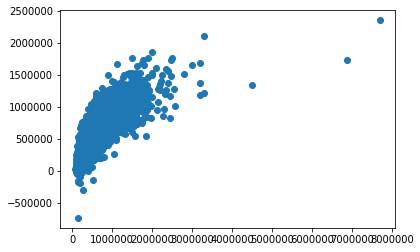

In [220]:
plt.scatter(y_test,lrV1.predict(X_test))

In [221]:
predictions = lrV1.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 138449.4053624949
MSE: 51994614338.8002
RMSE: 228023.2758706887


# Conclusions Model #1
Value of RMSE makes this model completly unacceptable. First attempt to increase model efficiency will be by remowing features highly correlated with another feature. It will reduce multicollinearity problem.

# Data Analysis #1

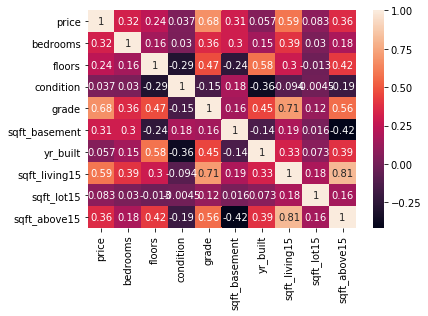

In [222]:
dfV1_1 = dfV1.copy()
dfV1_1['price'] = dfV1['price'].astype(np.int64)
dfV1_1['floors'] = dfV1['floors'].astype(np.int64)
sns.heatmap(dfV1_1.corr(), annot=True)

# Data Analysis #1 - Conclusions 
1st attempt (V1_2) - there is obvious linear relation between sqft_living, sqft_basement and sqft_above. To describe and compare houses living area it will be better to introduce sqft_above15 (sqft_living15 - sqft_basement) insted of sqft_above and sqft_living15), because there isnt much people who wants to live in basement. Thats why sqft_living15 and sqft_above will be neglected. It will reduce a model by one feature.

# Model #2

In [223]:
dfV1_2 = dfV1.copy()
dfV1_2.drop(columns = ['sqft_living15'], inplace=True)

XV1_2 = dfV1_2.drop(columns = ['price'])
yV1_2 = dfV1_2['price']

In [224]:
XV1_2_train, XV1_2_test, yV1_2_train, yV1_2_test = train_test_split(XV1_2, yV1_2)
lrV1_2 = LinearRegression()
lrV1_2.fit(XV1_2_train, yV1_2_train) 

predictionsV1_2 = lrV1_2.predict(XV1_2_test)

MAEV1_2 = metrics.mean_absolute_error(yV1_2_test, predictionsV1_2)
MSEV1_2 = metrics.mean_squared_error(yV1_2_test, predictionsV1_2)
RMSEV1_2 = np.sqrt(metrics.mean_squared_error(yV1_2_test, predictionsV1_2))

print('MAE:', MAEV1_2)
print('MSE:', MSEV1_2)
print('RMSE:', RMSEV1_2)


MAE: 138022.01151972628
MSE: 49152963125.370186
RMSE: 221704.67547025296


# Model #2 - Conclussions (V1_2) 

There isn't any or slight improvement in RMSE, the difference between predicted and test values didn't droped significantly. Value of MSE is still high, to increase model reliability, I will try find, define and reduce impact of outliers.

# Data analysis #2

After reducing multicolinearity it's time to seek for outliers

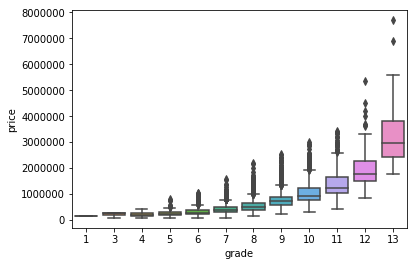

In [225]:
sns.boxplot(x = dfV1_2['grade'], y = dfV1_2['price'])

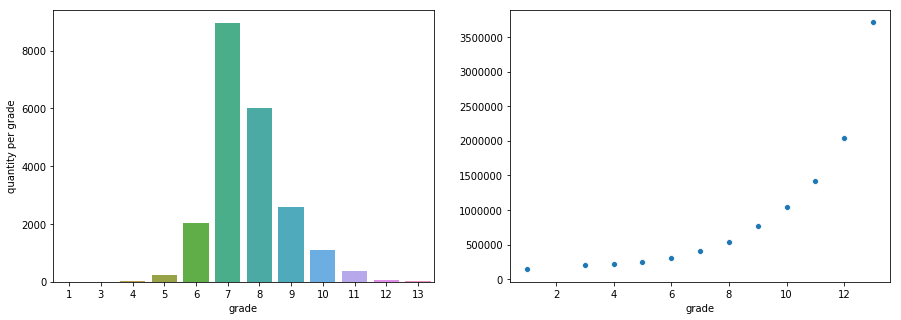

In [226]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
barplotdata = dfV1_2.groupby('grade').count()['price']
scatterplotdata = dfV1_2.groupby('grade').mean()['price']
sns.barplot(x = barplotdata.index, y = barplotdata.values, ax = axes[0])
axes[0].set(ylabel='quantity per grade')
sns.scatterplot(scatterplotdata.index, scatterplotdata.values, ax = axes[1])

# Data Analysis #2 - Conclusions

When I was looking for outliers I noticed (boxplot) lack of linear realtion between grade and price of the house. For this relation other (polynomial??) model should be used. To stick with LinearRegression model and stay in acceptable prediction precision range assumptions should be made. Two approchaes colud be made: 

1st - divide data on groups:
group A : from 1 grade to 8 - strong linear realation between price and grade in this range,
group B : other

2nd - split data for each grade, and for each grade establish a model (chosen for further model improvement)

# Model #3

In [227]:
class LinRegByGrade():
    def __init__(self, data, grade, coefficient_matrix = 0, preccission_matrix = 0):
        self.data = data
        self.grade = grade
        self.coefficient_matrix = coefficient_matrix
        self.preccission_matrix = preccission_matrix
        
    def preccision_matrix(self):
        preccission_matrix = pd.DataFrame(index = ['MAE', 'MSE', 'RMSE'], dtype=np.int64)
        coefficient_matrix = pd.DataFrame(index = ['bedrooms', 'floors', 'condition', 'sqft_basement', 'yr_built',
        'sqft_lot15', 'sqft_above15'])
        for i in self.grade:
            data = self.data[self.data['grade'] == i]
            #data.drop(colummns = ['zipcode', 'binned'])
            
            LR = LinearRegression()
            y = data['price']
            X = data.drop(columns = ['price', 'grade'])
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
            LR.fit(X_train, y_train)
            predictions = LR.predict(X_test)
            MAE = metrics.mean_absolute_error(y_test, predictions)
            MSE = metrics.mean_squared_error(y_test, predictions)
            RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
            #sns.scatterplot(y_test, predictions)
            delta =pd.DataFrame(y_test)
            delta['predictions'] = predictions
            delta['delta'] = delta['price'] - delta['predictions']
            delta['delta'] = delta['delta'].astype(np.int64)
            delta['predictions'] = delta['predictions'].astype(np.int64)
            col = 'grade ' + str(i)
            preccission_matrix[col] = [MAE, MSE, RMSE]
            coefficient_matrix[col] = LR.coef_
            #print(MAE)
            #print(MSE)
            #print(RMSE)
            #print(delta)
        self.preccission_matrix = preccission_matrix
        self.coefficient_matrix = coefficient_matrix
        

In [228]:
Test = LinRegByGrade(dfV1_2, [3,4,5,6,7,8,9,10,11,12,13])
Test.preccision_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [231]:
Test.preccission_matrix

,grade 3,grade 4,grade 5,grade 6,grade 7,grade 8,grade 9,grade 10,grade 11,grade 12,grade 13
MAE,2.404272e+05,1.633742e+05,6.556441e+04,7.497169e+04,9.570226e+04,1.241780e+05,1.837627e+05,2.858599e+05,3.377022e+05,5.430608e+05,3.346725e+06
MSE,5.780525e+10,7.401223e+10,6.448036e+09,1.041993e+10,1.512370e+10,2.650249e+10,6.696416e+10,1.338947e+11,1.619938e+11,5.328077e+11,1.147616e+13
RMSE,2.404272e+05,2.720519e+05,8.029967e+04,1.020781e+05,1.229784e+05,1.627959e+05,2.587743e+05,3.659163e+05,4.024845e+05,7.299368e+05,3.387648e+06


In [232]:
Test.coefficient_matrix

,grade 3,grade 4,grade 5,grade 6,grade 7,grade 8,grade 9,grade 10,grade 11,grade 12,grade 13
bedrooms,2.220446e-16,2.457111e+04,-13152.455222,92.538610,318.281168,-3156.123988,30099.004050,110272.520400,77050.054752,140066.749397,-3.353113e+04
floors,0.000000e+00,-1.758165e+05,25555.499272,30773.369922,81741.060766,98862.940829,126293.276677,65239.416800,81470.672900,281686.194550,3.824473e+06
condition,-5.068364e-04,1.703158e+04,12082.145797,12441.521487,13996.054009,27903.351918,55267.912482,89575.884971,196004.406682,174309.262241,5.405904e+06
sqft_basement,0.000000e+00,-9.451924e-10,228.408291,174.126899,203.922254,212.518544,268.698241,123.910729,193.841246,101.229185,-4.653536e+01
yr_built,5.068364e-03,2.073080e+03,-258.359832,-1218.880173,-2751.170365,-3446.415455,-4298.355102,-5971.737863,-1024.629438,5774.413001,2.322319e+04
sqft_lot15,1.742841e+00,2.614833e+00,-0.120748,-0.047210,-0.027113,-0.191794,-0.213069,-0.854934,-0.236167,-1.784304,2.167396e+01
sqft_above15,-5.913091e-02,6.962398e+01,147.041081,110.485354,119.734639,118.927158,103.349574,-0.216157,-44.750498,-139.763412,-1.185106e+02


# Model 3 - Conclusions V1_3 


In [233]:
dfV1_2['price'].mean() #mean house prices 
RMSEV1_2 / dfV1_2['price'].mean() #- dfV1_2['price'].mean()  -  mean house prices used in model #2

0.4170802431694535

In [234]:
df_Model3_conslusions = (dfV1_2.groupby('grade').mean())
df_Model3_conslusions
a = list(df_Model3_conslusions.index)
b=[]
for i in a:
    j = 'grade '+ str(i)
    b.append(j)
    
df_Model3_conslusions.index = b
df_Model3_conslusions.drop(index = 'grade 1', inplace = True)

In [235]:
df_Model3_conslusions.drop(columns = ['floors', 'condition', 'sqft_basement', 'yr_built',
       'sqft_lot15', 'sqft_above15'], inplace = True)

In [236]:
df_Model3_comparison = Test.preccission_matrix
df_Model3_comparison = df_Model3_comparison.transpose()
df_Model3_comparison

,MAE,MSE,RMSE
grade 3,2.404272e+05,5.780525e+10,2.404272e+05
grade 4,1.633742e+05,7.401223e+10,2.720519e+05
grade 5,6.556441e+04,6.448036e+09,8.029967e+04
grade 6,7.497169e+04,1.041993e+10,1.020781e+05
grade 7,9.570226e+04,1.512370e+10,1.229784e+05
grade 8,1.241780e+05,2.650249e+10,1.627959e+05
grade 9,1.837627e+05,6.696416e+10,2.587743e+05
grade 10,2.858599e+05,1.338947e+11,3.659163e+05
grade 11,3.377022e+05,1.619938e+11,4.024845e+05
grade 12,5.430608e+05,5.328077e+11,7.299368e+05


In [237]:
df_Model3_comparison = df_Model3_comparison.merge(df_Model3_conslusions, left_index=True, right_index=True)
df_Model3_comparison['RMSE / mean price'] = df_Model3_comparison['RMSE']/df_Model3_comparison['price']
df_Model3_comparison

,MAE,MSE,RMSE,price,bedrooms,RMSE / mean price
grade 3,2.404272e+05,5.780525e+10,2.404272e+05,2.056667e+05,1.000000,1.169014
grade 4,1.633742e+05,7.401223e+10,2.720519e+05,2.143810e+05,1.482759,1.269011
grade 5,6.556441e+04,6.448036e+09,8.029967e+04,2.459660e+05,2.403361,0.326467
grade 6,7.497169e+04,1.041993e+10,1.020781e+05,3.002466e+05,2.687562,0.339981
grade 7,9.570226e+04,1.512370e+10,1.229784e+05,4.014742e+05,3.256419,0.306317
grade 8,1.241780e+05,2.650249e+10,1.627959e+05,5.382225e+05,3.480591,0.302469
grade 9,1.837627e+05,6.696416e+10,2.587743e+05,7.672723e+05,3.779151,0.337265
grade 10,2.858599e+05,1.338947e+11,3.659163e+05,1.041524e+06,3.915009,0.351328
grade 11,3.377022e+05,1.619938e+11,4.024845e+05,1.422826e+06,4.179420,0.282877
grade 12,5.430608e+05,5.328077e+11,7.299368e+05,2.035135e+06,4.253165,0.358667


For Model #2 the bigest cotribution into mean price value and RMSE have houses with grade 6,7,8,9. Comparing RMSE/mean  price (0.44) for Model #2 with RMSE/mean price (0.31 - 0.39) for Model #3 we can see an improvement in predicted values. Houses with grade 12 and 13 are very unique, so big RMSE might be caused by 'end of the scale' effect, maybe grade 14 should be created for better assesment.

Level of model reliability is still unsufficient. Further exploratory Data Analysis is required.

When soemeone is looking for a place to live, important thing is how far apart from workplace, swimming pool or kindergarden, house is. Zipcode represents an area with similar properties, like distance from key places, parking spaces, public transport  etc.. Such a group of houses (with same zipcode) have similar price creating factors like price for sqft of lot, demand and overall neighbourhood. 

That's why I am going to look closer at this aspect.



# Data Analysis #3

[]

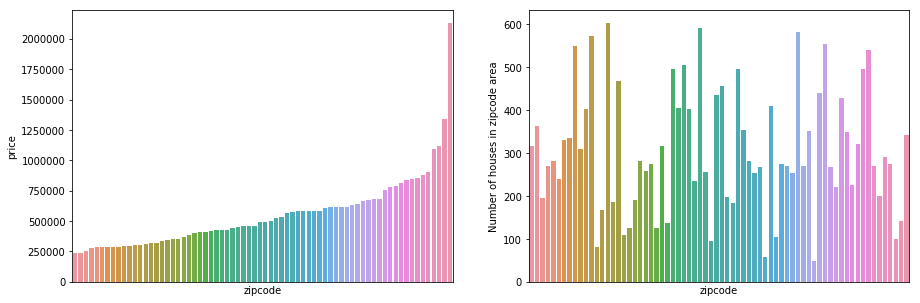

In [238]:
dfV1_3 = dfV1_2.merge(df[['zipcode', 'waterfront']], left_index=True, right_index=True)
f, axes = plt.subplots(1, 2,figsize=(15,5))
databarplotV1_3 = dfV1_3.groupby('zipcode').mean()

databarplotV1_3.sort_values('price', inplace=True)
sns.barplot(databarplotV1_3.index, databarplotV1_3['price'], order = databarplotV1_3.index, ax=axes[0])
#databarplotV1_3
sns.barplot(databarplotV1_3.index,dfV1_3.groupby('zipcode').count()['price'], ax=axes[1] )
axes[1].set(ylabel = 'Number of houses in zipcode area')

axes[0].set_xticks([])
axes[1].set_xticks([])

In [239]:
#f, axes = plt.subplots(1, 2,figsize=(15,5))
databarplot2V1_3 = dfV1_3.groupby('waterfront').mean()
databarplot2V1_3['price']

waterfront
0    531563.599814
Name: price, dtype: float64

# Data Analysis #3 - Conslusions

There is huge variety in mean prices for difrent areas - zipcodes (from 300k to 2200k). To have full picture about influance of mixing houses form diffrent areas in one LReg model, we should compare mean sqft_above15 and sqft_lot with price increases in same zipcode-area. But I will assume that, they have similar mean values of mentioned factors > this factors don't grow proportionally with price.

I will introduce data binning based on price of mean houses value in each zipcode-area, it will return a list of zipcodes in the same diffined cost-group. It will reduce non-linearity created by diffrent house demand in diffrent areas. If this procedure reduce RMSE or RMSE/mean price it will mean the assumption is correct.

# Model #4

In [240]:
class DataPrep():
    def __init__(self, data, grade = [], list_of_dfs_cost=[], list_of_binned_zipcode = []):
        self.data = data
        self.grade = grade
        #self.bedrooms = bedrooms
        self.list_of_dfs_cost=list_of_dfs_cost
        self.list_of_binned_zipcode = list_of_binned_zipcode
                            
    def grade_similarity(self):
        self.data = self.data[self.data['grade'] == self.grade]
        
    def bedrooms_similarity(self):
        self.data = self.data[self.data['bedrooms'] == self.bedrooms]
        

    def cost_binning(self):
        bins = [0, 300000, 500000, 700000, 1000000, 999999999]
        list_of_dfs_cost = []
        dfcost = self.data
        dfcost['binned'] = pd.cut(self.data['price'],bins)
        a = list(dfcost['binned'].unique())
        a.sort()
        for i in range(0, len(a), 1):
            b = dfcost[dfcost.binned == a[i]]
            
            list_of_dfs_cost.append(b)
            
        self.list_of_dfs_cost = list_of_dfs_cost
        
    def zipcode_binning(self):  # method created due to Data Analysis #3 - Conslusions
        bins = [0, 300000, 500000, 700000, 1000000, 999999999]
        list_of_binned_zipcode = []
        dfzipcode = self.data
        c = dfzipcode.groupby('zipcode').mean()
        c['binned'] = pd.cut(c['price'],bins)
        a = list(c['binned'].unique())
        a.sort()
        for i in range(0, len(a), 1):
            b = c[c.binned == a[i]]
            
            list_of_binned_zipcode.append(list(b.index))
            
        self.list_of_binned_zipcode = list_of_binned_zipcode

In [241]:
dfV1_4 = df.drop(columns = ['id', 'date', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 
               'view', 'sqft_above', 'yr_renovated',  'lat', 'long'])
dfV1_4['sqft_above15'] = dfV1_4['sqft_living15'] - dfV1_4['sqft_basement']

In [246]:
# 1st group
ListZipcode  = DataPrep(dfV1_4)
ListZipcode.zipcode_binning()
ListZipcode.list_of_binned_zipcode[0]

data_test_2 = dfV1_4[dfV1_4['zipcode'].isin(ListZipcode.list_of_binned_zipcode[0])]
data_test_2 = data_test_2.drop(columns = ['zipcode', 'sqft_living15']) # 'binned', 

Test2 = LinRegByGrade(data_test_2, [5, 6,7, 8, 9, 10, 11] )
Test2.preccision_matrix()

df1st = Test2.preccission_matrix
df1st = df1st.transpose()
df1stgrouped = data_test_2.groupby('grade').mean()
df1stgrouped.iloc[1:]

a = list(df1stgrouped.index)
b=[]
for i in a:
    j = 'grade '+ str(i)
    b.append(j)
    
df1stgrouped.index = b
df1stgrouped = df1stgrouped.iloc[1:]
df1stgrouped
#df1st
df1st = df1st.merge(df1stgrouped, left_index=True, right_index=True)
df1st.drop(columns = ['bedrooms', 'floors', 'condition',
       'sqft_basement', 'yr_built', 'sqft_lot15', 'sqft_above15'], inplace = True)
df1st['RMSE/mean price'] = df1st['RMSE'] / df1st['price']
df1st

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,MAE,MSE,RMSE,price,RMSE/mean price
grade 5,52625.225020,3.379122e+09,58130.217436,175612.413793,0.331014
grade 6,32174.382464,1.754478e+09,41886.486660,212178.749409,0.197411
grade 7,35891.182524,2.295602e+09,47912.440471,257835.422313,0.185826
grade 8,48542.409492,4.049540e+09,63635.997395,322640.743007,0.197235
grade 9,54420.605617,4.851571e+09,69653.221848,437614.007519,0.159166
grade 10,126340.515649,3.238472e+10,179957.546825,539205.813953,0.333746
grade 11,346288.897765,1.553428e+11,394135.487675,770125.000000,0.511781


In [254]:
# 2nd group
ListZipcode  = DataPrep(dfV1_4)
ListZipcode.zipcode_binning()
ListZipcode.list_of_binned_zipcode[1] #CHANGED
data_test_2 = dfV1_4[dfV1_4['zipcode'].isin(ListZipcode.list_of_binned_zipcode[1])] #CHANGED
data_test_2 = data_test_2.drop(columns = ['zipcode', 'sqft_living15']) # 'binned', 
Test2 = LinRegByGrade(data_test_2, [3,4, 5, 6,7, 8, 9, 10, 11,12] )
Test2.preccision_matrix()
df2nd = Test2.preccission_matrix

df2nd = df2nd.transpose()
df2ndgrouped = data_test_2.groupby('grade').mean()
df2ndgrouped.iloc[1:]

a = list(df2ndgrouped.index)
b=[]
for i in a:
    j = 'grade '+ str(i)
    b.append(j)
    
df2ndgrouped.index = b
#df2ndgrouped = df2ndgrouped.iloc[1:]
df2ndgrouped
#df1st
df2nd = df2nd.merge(df2ndgrouped, left_index=True, right_index=True)
df2nd.drop(columns = ['bedrooms', 'floors', 'condition',
       'sqft_basement', 'yr_built', 'sqft_lot15', 'sqft_above15'], inplace = True)
df2nd['RMSE/mean price'] = df2nd['RMSE'] / df2nd['price']
df2nd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,MAE,MSE,RMSE,price,RMSE/mean price
grade 3,121970.679733,1.487685e+10,121970.679733,2.056667e+05,0.593050
grade 4,293100.000355,1.232275e+11,351037.752614,2.244000e+05,1.564339
grade 5,67608.972152,8.342123e+09,91335.220723,2.412555e+05,0.378583
grade 6,61559.331278,6.463180e+09,80393.906789,2.810485e+05,0.286050
grade 7,65234.532279,6.999621e+09,83663.737420,3.493885e+05,0.239458
grade 8,80571.192803,1.094139e+10,104601.115188,4.420855e+05,0.236608
grade 9,114399.200874,2.037120e+10,142727.718504,5.654606e+05,0.252410
grade 10,177310.681779,4.594501e+10,214347.879611,8.026730e+05,0.267043
grade 11,225448.761438,9.427323e+10,307039.454818,1.082475e+06,0.283646
grade 12,159736.882701,2.551587e+10,159736.882701,1.412600e+06,0.113080


In [255]:
# 3rd group
ListZipcode  = DataPrep(dfV1_4)
ListZipcode.zipcode_binning()
ListZipcode.list_of_binned_zipcode[2] #CHANGED
data_test_2 = dfV1_4[dfV1_4['zipcode'].isin(ListZipcode.list_of_binned_zipcode[2])] #CHANGED
data_test_2 = data_test_2.drop(columns = ['zipcode', 'sqft_living15']) # 'binned', 
Test2 = LinRegByGrade(data_test_2, [4, 5, 6,7, 8, 9, 10, 11, 12, 13] )
Test2.preccision_matrix()
df3rd = Test2.preccission_matrix

df3rd = df3rd.transpose()
df3rdgrouped = data_test_2.groupby('grade').mean()
df3rdgrouped.iloc[1:]

a = list(df3rdgrouped.index)
b=[]
for i in a:
    j = 'grade '+ str(i)
    b.append(j)
    
df3rdgrouped.index = b
#df3rdgrouped = df3rdgrouped.iloc[1:]
df3rdgrouped
#df1st
df3rd = df3rd.merge(df3rdgrouped, left_index=True, right_index=True)
df3rd.drop(columns = ['bedrooms', 'floors', 'condition',
       'sqft_basement', 'yr_built', 'sqft_lot15', 'sqft_above15'], inplace = True)
df3rd['RMSE/mean price'] = df3rd['RMSE'] / df3rd['price']
df3rd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,MAE,MSE,RMSE,price,RMSE/mean price
grade 4,7.225148e+04,5.220276e+09,7.225148e+04,2.334100e+05,0.309547
grade 5,7.969428e+04,8.960204e+09,9.465835e+04,3.319864e+05,0.285127
grade 6,6.794608e+04,1.153195e+10,1.073869e+05,3.956648e+05,0.271409
grade 7,7.645975e+04,1.032777e+10,1.016256e+05,5.051505e+05,0.201179
grade 8,8.662844e+04,1.326702e+10,1.151826e+05,5.857412e+05,0.196644
grade 9,1.274917e+05,2.778927e+10,1.667011e+05,7.821992e+05,0.213119
grade 10,1.756593e+05,5.926328e+10,2.434405e+05,9.376719e+05,0.259622
grade 11,2.104188e+05,6.884529e+10,2.623839e+05,1.185382e+06,0.221350
grade 12,5.141497e+05,5.952979e+11,7.715555e+05,1.805857e+06,0.427252
grade 13,2.263999e+06,5.125693e+12,2.263999e+06,3.034333e+06,0.746127


In [256]:
# 4th group
ListZipcode  = DataPrep(dfV1_4)
ListZipcode.zipcode_binning()
ListZipcode.list_of_binned_zipcode[3] #CHANGED
data_test_2 = dfV1_4[dfV1_4['zipcode'].isin(ListZipcode.list_of_binned_zipcode[3])] #CHANGED
data_test_2 = data_test_2.drop(columns = ['zipcode', 'sqft_living15']) # 'binned', 
Test2 = LinRegByGrade(data_test_2, [5, 6,7, 8, 9, 10, 11, 12, 13] )
Test2.preccision_matrix()
df4th = Test2.preccission_matrix

df4th = df4th.transpose()
df4thgrouped = data_test_2.groupby('grade').mean()
df4thgrouped.iloc[1:]

a = list(df4thgrouped.index)
b=[]
for i in a:
    j = 'grade '+ str(i)
    b.append(j)
    
df4thgrouped.index = b
#df4thgrouped = df4thgrouped.iloc[1:]
df4thgrouped
#df1st
df4th = df4th.merge(df4thgrouped, left_index=True, right_index=True)
df4th.drop(columns = ['bedrooms', 'floors', 'condition',
       'sqft_basement', 'yr_built', 'sqft_lot15', 'sqft_above15'], inplace = True)
df4th['RMSE/mean price'] = df4th['RMSE'] / df4th['price']
df4th

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,MAE,MSE,RMSE,price,RMSE/mean price
grade 5,1.181471e+05,1.395874e+10,1.181471e+05,5.533333e+05,0.213519
grade 6,1.200475e+05,2.247671e+10,1.499223e+05,5.067044e+05,0.295877
grade 7,9.037646e+04,1.522468e+10,1.233883e+05,5.750857e+05,0.214556
grade 8,1.129581e+05,2.164196e+10,1.471121e+05,7.052698e+05,0.208590
grade 9,1.628361e+05,4.666441e+10,2.160195e+05,9.101561e+05,0.237343
grade 10,2.671402e+05,1.225281e+11,3.500401e+05,1.097166e+06,0.319040
grade 11,2.826421e+05,1.374955e+11,3.708038e+05,1.481499e+06,0.250290
grade 12,3.589948e+05,1.848436e+11,4.299344e+05,1.726141e+06,0.249073
grade 13,2.004053e+06,6.127018e+12,2.475281e+06,3.514500e+06,0.704305


In [270]:
# 5th group
ListZipcode  = DataPrep(dfV1_4)
ListZipcode.zipcode_binning()
ListZipcode.list_of_binned_zipcode[4] #CHANGED
data_test_2 = dfV1_4[dfV1_4['zipcode'].isin(ListZipcode.list_of_binned_zipcode[4])] #CHANGED
data_test_2 = data_test_2.drop(columns = ['zipcode', 'sqft_living15']) # 'binned', 
Test2 = LinRegByGrade(data_test_2, [ 6,7, 8, 9, 10, 11, 12, 13] )
Test2.preccision_matrix()
df5th = Test2.preccission_matrix

df5th = df5th.transpose()
df5thgrouped = data_test_2.groupby('grade').mean()
#df5thgrouped.iloc[1:]

a = list(df5thgrouped.index)
b=[]
for i in a:
    j = 'grade '+ str(i)
    b.append(j)
    
df5thgrouped.index = b
df5thgrouped = df5thgrouped.iloc[1:]
df5thgrouped
#df1st
df5th = df5th.merge(df5thgrouped, left_index=True, right_index=True)
df5th.drop(columns = ['bedrooms', 'floors', 'condition',
       'sqft_basement', 'yr_built', 'sqft_lot15', 'sqft_above15'], inplace = True)
df5th['RMSE/mean price'] = df5th['RMSE'] / df5th['price']
df5th

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,MAE,MSE,RMSE,price,RMSE/mean price
grade 7,1.318697e+05,2.942759e+10,1.715447e+05,7.405350e+05,0.231650
grade 8,1.996763e+05,8.804808e+10,2.967290e+05,9.357934e+05,0.317088
grade 9,3.157962e+05,1.462841e+11,3.824710e+05,1.268408e+06,0.301536
grade 10,4.331541e+05,3.096642e+11,5.564748e+05,1.580596e+06,0.352066
grade 11,4.859045e+05,3.546024e+11,5.954850e+05,2.040736e+06,0.291799
grade 12,1.308248e+06,2.754171e+12,1.659569e+06,3.137044e+06,0.529023
grade 13,1.531372e+06,2.345101e+12,1.531372e+06,5.418333e+06,0.282628


# Model #4 - Conclussions

FirstToDO:
Create a class or function for elegant data gathering about model #4 performance.
Foe few grades we reached a level 0.2-0.3 RMSE/mean price

Further improvement is neccesery, or prepare a funcionality that will choose underrated houses.

